In [1]:
import pandas as pd
import numpy as np

# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), columns = ['x', 'y'])

x = df['x']
y = df['y']

df

,x,y
0,100,96
1,93,90
2,84,89
3,80,85
4,76,80
5,70,68
6,79,75


# Line of Best Fit

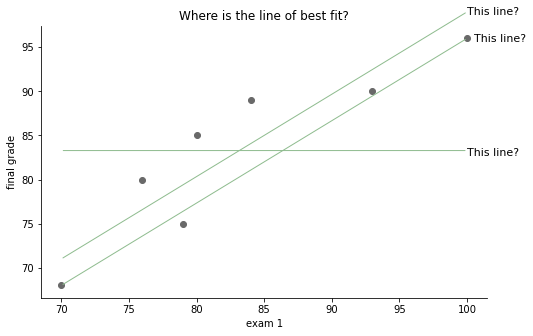

In [2]:
import viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("axes.spines", top=False, right=False)
viz.evaluation_example1(df, x, y)

# Establish a Baseline

In [3]:
df['yhat_baseline'] = df['y'].mean()
df.head(3)

,x,y,yhat_baseline
0,100,96,83.285714
1,93,90,83.285714
2,84,89,83.285714


In [4]:
## the average of our target variable is 83.285, so we will use that as our baseline prediction

## the goal is to be more accurate than the baseline

# Build a Simple Model

In [5]:
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('y ~ x', data=df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(x)

df.head(3)

,x,y,yhat_baseline,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350


In [6]:
## yhat is our prediction, we want that to be close to the actual y than the baseline

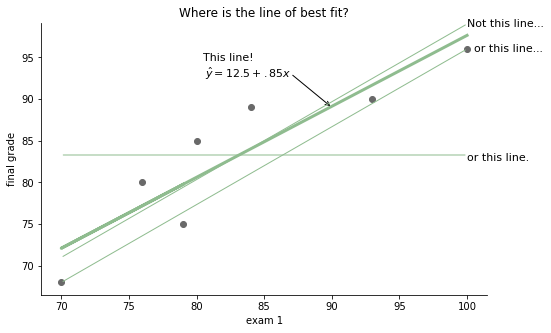

In [7]:
viz.evaluation_example2(df, x, y)

# Evaluate Part 1: RMSE

## Residuals

In [8]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
# compute residuals
df['residual'] = df['yhat'] - df['y']
df['residual_baseline'] = df['yhat_baseline'] - df['y']

In [10]:
## residual is the distance between the predicted value and the actual value

## the sum of the residuals is not sufficient because the positive and negative values will cancel eachother out

In [11]:
df.head()

,x,y,yhat_baseline,yhat,residual,residual_baseline
0,100,96,83.285714,97.635214,1.635214,-12.714286
1,93,90,83.285714,91.676524,1.676524,-6.714286
2,84,89,83.285714,84.015350,-4.984650,-5.714286
3,80,85,83.285714,80.610384,-4.389616,-1.714286
4,76,80,83.285714,77.205418,-2.794582,3.285714


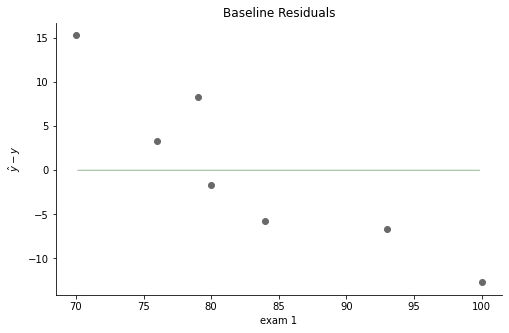

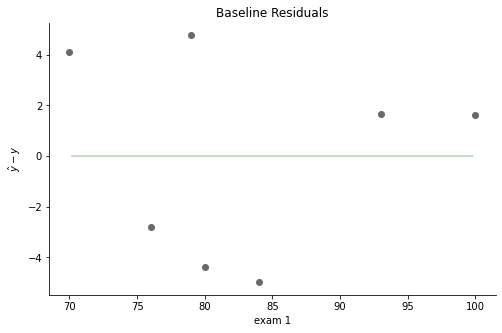

In [12]:
viz.evaluation_example5(df, x, df.residual_baseline)
viz.evaluation_example5(df, x, df.residual)

## SSE / RSS

### Sum of the Squared Errors / Residual Sum of Squares

In [13]:
# square each residual value
df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

df.head(3)

,x,y,yhat_baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
0,100,96,83.285714,97.635214,1.635214,-12.714286,2.673926,161.653061
1,93,90,83.285714,91.676524,1.676524,-6.714286,2.810732,45.081633
2,84,89,83.285714,84.015350,-4.984650,-5.714286,24.846737,32.653061


In [14]:
## squaring the residuals will negate the negative values

In [15]:
# SSE
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  96.85259593679456
SSE - baseline =  555.4285714285714


In [16]:
## The SSE is significantly lower than the baseline SSE, we can conclude that our model is more accurate

## MSE

### Mean Squared Error

In [17]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  13.836085133827794
MSE baseline =  79.34693877551021


In [18]:
## calculated by finding the mean of the SSE

### susceptable to outliers, but if they are not a problem this is a better metric to use

## once again we can conclude that our model is more accurate, the MSE is lower than the baseline

## RMSE

### Root Mean Squared Error

In [19]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  3.719688849060872
RMSE baseline =  8.907689867497083


In [20]:
## calculated by finding the square root of the MSE

### best when you want to see the error in the same units as the y value

## once again our RMSE is lower than the baseline

# Scikit-Learn

## Calculate Metrics Automatically

### SSE

In [21]:
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(df.y, df.yhat)*len(df)
SSE2_baseline = mean_squared_error(df.y, df.yhat_baseline)*len(df)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline)

SSE manual == SSE sklearn:  True
SSE manual - baseline == SSE sklearn - baseline:  True


In [22]:
## Scikit-Learn does not have an SSE function, we will have to use the MSE function and multiply by the amount

### MSE

In [23]:
MSE2 = mean_squared_error(df.y, df.yhat)

MSE2_baseline = mean_squared_error(df.y, df.yhat_baseline)


print("MSE manual == MSE sklearn: ", MSE == MSE2) 
print("MSE manual - baseline == MSE sklearn - baseline: ", MSE_baseline == MSE2_baseline) 

MSE manual == MSE sklearn:  True
MSE manual - baseline == MSE sklearn - baseline:  True


### RMSE

In [24]:
RMSE2 = sqrt(mean_squared_error(df.y, df.yhat))
RMSE2_baseline = sqrt(mean_squared_error(df.y, df.yhat_baseline))

print("RMSE manual == RMSE skearn: ", RMSE == RMSE2) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", RMSE_baseline == RMSE2_baseline)

RMSE manual == RMSE skearn:  True
RMSE manual - baseline == RMSE skearn - baseline:  True


In [25]:
## Scikit-Learn does not have an RMSE function either, we will have to find the sqrt of the MSE

In [26]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

  metric  model_error
0    SSE    96.852596
1    MSE    13.836085
2   RMSE     3.719689
          metric  model_error
0   SSE_baseline   555.428571
1   MSE_baseline    79.346939
2  RMSE_baseline     8.907690


# Draw Conclusions

In [27]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,96.852596,-458.575975
1,MSE,13.836085,-65.510854
2,RMSE,3.719689,-5.188001


In [28]:
## find the error delta by taking the difference of the baseline metrics with the models metrics

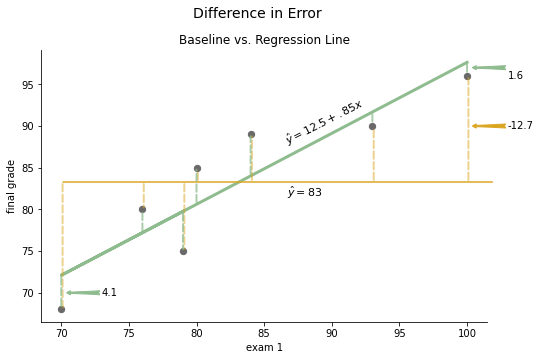

In [29]:
yhat = df.yhat
viz.evaluation_example3(df, x, y, yhat)

# Evaluate Part 2: Model Significance

## Manually

### ESS
Explained Sum of Squares

In [31]:
# compute explained sum of squares
ESS = sum((df.yhat - df.y.mean())**2)

ESS

458.57597549177694

In [32]:
## first you compute the ESS

## the difference between the predicted values, and the actual values

### TSS
Total Sum of Squares

In [33]:
SSE = df_eval[df_eval.metric=='SSE']['model_error']
TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE[0])
print("TSS = ", TSS[0])

ESS =  458.57597549177694
SSE =  96.85259593679456
TSS =  555.4285714285716


In [34]:
## then you must calculate the TSS

## the difference between the actual values, and the mean of the actual values (baseline)

### R-Squared

In [35]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0    0.826
Name: model_error, dtype: float64
Percent of variance in y explained by x =  0    82.6
Name: model_error, dtype: float64 %


In [36]:
## r squared is found by making a ratio of the ESS to the TSS

## Scikit-Learn

In [37]:
# statsmodels.ols

r2 = ols_model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.826


In [38]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(df.y, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.826


## Draw Conclusions

In [39]:
f_pval = ols_model.f_pvalue

print("p-value for model significance = ", round(f_pval,4))

p-value for model significance =  0.0046


In [40]:
## our p value is less than a .05 alpha, we can conclude that our findings are significant

# Evaluate Part 3: Feature Significance

## T-test

### The null hypothesis states that the model without this variable fits the data as well as your model. (Significance > 0.05)

### The alternative hypothesis says that your model fits the data better with that independent variable than the model without that variable (Significance F <= 0.05)

In [41]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     23.67
Date:                Tue, 16 Mar 2021   Prob (F-statistic):            0.00461
Time:                        14:07:20   Log-Likelihood:                -19.128
No. Observations:                   7   AIC:                             42.26
Df Residuals:                       5   BIC:                             42.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5111     14.641      0.855      0.432     -25.124      50.146
x              0.8512      0.175      4.866      0.005       0.402       1.301
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.983
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.776
Skew:                           0.124   Prob(JB):                        0.678
Kurtosis:                       1.388   Cond. No.                         737.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""